#Libraries, Directory and data

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching


In [ ]:
#Install libraries

!pip install CausalInference

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from causalinference import CausalModel



In [ ]:
#Data
df = pd.read_csv('school.csv')
df.head()

,childid,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0001002C,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0001004C,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0001010C,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,0001011C,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0001012C,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


In [ ]:
#remove column childid because is not neccesary (data cleaninig)

df = df.drop(columns=['childid'])
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


#Data Analysis (compare groups)

In [ ]:
#Compare both groups (Catholic and non catholic)

# Separate the data by Catholic and non-Catholic groups
catholic_group = df[df['catholic'] == 1]
non_catholic_group = df[df['catholic'] == 0]

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Compare the groups by calculating the mean for each numeric column
comparison = pd.DataFrame({
    'Catholic': catholic_group[numeric_cols].mean(),
    'Non-Catholic': non_catholic_group[numeric_cols].mean()
})

# Display the comparison
print(comparison)

                         Catholic  Non-Catholic
catholic                 1.000000      0.000000
number_places_lived      1.073118      1.106246
mom_age                 39.775269     37.794621
dad_age                 42.007527     40.134919
mom_score               47.620871     43.909495
dad_score               45.908269     42.590520
income               86180.625269  65393.928540
poverty                  0.016129      0.101578
food_stamps              0.006452      0.045566
score_standardized       0.219685      0.163128


In [ ]:
#t-test
from scipy.stats import ttest_ind

# Perform t-tests on each numeric column
t_test_results = {}
for column in numeric_cols:
    t_stat, p_value = ttest_ind(catholic_group[column], non_catholic_group[column], nan_policy='omit')
    t_test_results[column] = {'t-statistic': t_stat, 'p-value': p_value}

# Convert results to a DataFrame for easier reading
t_test_df = pd.DataFrame(t_test_results).T

# Display the results
print(t_test_df)


                     t-statistic       p-value
catholic                     inf  0.000000e+00
number_places_lived    -2.694431  7.072609e-03
mom_age                 9.824654  1.359492e-22
dad_age                 8.185690  3.344265e-16
mom_score               9.032983  2.280116e-19
dad_score               8.672932  5.489722e-18
income                 13.513541  5.943636e-41
poverty                -8.473453  3.034281e-17
food_stamps            -5.633591  1.853776e-08
score_standardized      1.644304  1.001714e-01


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# I did the same as above but just for the data i need (filter)
# Separate the data into Catholic and non-Catholic groups
catholic_income = df[df['catholic'] == 1]['income']
non_catholic_income = df[df['catholic'] == 0]['income']

# Perform the t-test for the income column
t_stat, p_value = ttest_ind(catholic_income, non_catholic_income, nan_policy='omit')

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 13.513541496069346
P-value: 5.943636213205364e-41


####In general, when comparing two groups with a t-test, the t-statistic and p-value are crucial for determining whether there’s a statistically significant difference in any given variable between those groups. Here’s how they work across different variables:

T-statistic:

The t-statistic quantifies the size of the difference between the groups’ means relative to the variability (spread) within each group.
A high absolute t-statistic suggests a notable difference between the group means. Whether it’s positive or negative indicates which group has the higher mean, with positive suggesting the first group (Catholic, in this case) has a higher mean for that variable, and negative suggesting the opposite.
Each variable can yield a different t-statistic based on its own distribution and variance across the groups.
P-value:

The p-value tells us how likely it is that we’d observe a difference as extreme as we see in our data if there were actually no true difference (null hypothesis).
A p-value less than a chosen threshold (typically 0.05) suggests that the observed difference is statistically significant. This would mean, for example, that variables like mom_age, dad_score, or score_standardized differ meaningfully between the groups.
Conversely, a high p-value (greater than or equal to 0.05) indicates that any observed difference in that variable might just be due to random variation and not a true difference in the population.
This general approach applies to any variable where you want to check for differences between groups, allowing you to assess whether group membership (like religious affiliation in this case) is likely to influence each specific variable.

In [ ]:
#Chi-square
# the test will be between poverty and food_stamps because they are the binary ones

from scipy.stats import chi2_contingency

# Create a contingency table for 'poverty' and 'food_stamps'
contingency_table = pd.crosstab(df['poverty'], df['food_stamps'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)



Chi-Square Statistic: 809.4800795485735
P-Value: 4.687445549687718e-178
Degrees of Freedom: 1
Expected Frequencies:
 [[4764.34444649  192.65555351]
 [ 453.65555351   18.34444649]]


####Interpretation
Chi-Square Statistic:

The chi-square statistic of 809.48 is extremely large. This suggests that the observed frequencies of individuals in different categories of poverty and food stamp usage significantly deviate from the expected frequencies, indicating a strong association between the two variables.
P-Value:

The p-value of
4.69
×
1
0
−
178
4.69×10
−178
  is vastly below any conventional significance level (such as 0.05 or 0.01). This indicates that the likelihood of observing such a chi-square statistic under the null hypothesis (which states that there is no association between poverty and food stamp usage) is extremely low. Hence, we reject the null hypothesis.
Degrees of Freedom:

With 1 degree of freedom, the large chi-square statistic and extremely low p-value confirm a robust association between the two categorical variables.
Expected Frequencies:

The expected frequencies indicate what we would anticipate if there were no association between poverty and food stamp usage. The expected counts for each category are much higher than the observed counts for food stamps among those in poverty, reinforcing the idea that people in poverty are more likely to use food stamps than those not in poverty.
Conclusions
Association: There is a strong association between poverty and food stamp usage. The results indicate that individuals in poverty are significantly more likely to utilize food stamps compared to those not in poverty.

Implications: This finding suggests that poverty levels are an important factor in the utilization of food assistance programs. Policymakers and social workers can use this information to tailor food assistance programs more effectively to support those in poverty.

Further Research: The results may prompt further investigation into the underlying reasons for this association, such as the accessibility of food stamps, the effectiveness of outreach programs, or socioeconomic factors contributing to both poverty and food assistance needs.

Overall, your chi-square test results provide strong evidence of a relationship between poverty and food stamp utilization, which can have significant implications for social policy and support programs.

#Data preparation

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#Race variable
df.race.value_counts()

,count
race,
"WHITE, NON-HISPANIC",3654
"HISPANIC, RACE NOT SPECIFIED",408
"HISPANIC, RACE SPECIFIED",387
"BLACK OR AFRICAN AMERICAN, NON-HISPANIC",357
ASIAN,342
"MORE THAN ONE RACE, NON HISPANIC",123
"NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER",93
AMERICAN INDIAN OR ALASKA NATIVE,62
NOT ASCERTAINED,3


In [ ]:
#Transforming race variable
df['race_white'] = np.where(df.race == 'WHITE, NON-HISPANIC', 1, 0)
df['race_hispanic'] = np.where((df.race == 'HISPANIC, RACE NOT SPECIFIED') |
                               (df.race == 'HISPANIC, RACE SPECIFIED'), 1, 0)
df['race_black'] = np.where(df.race == 'BLACK OR AFRICAN AMERICAN, NON-HISPANIC', 1, 0)
df['race_asian'] = np.where(df.race == 'ASIAN', 1, 0)

In [ ]:
df.head(2)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0


In [ ]:
#Education variable overview
df.mom_education.value_counts()

,count
mom_education,
SOME COLLEGE,1721
HIGH SCHOOL DIPLOMA/EQUIVALENT,1306
BACHELOR'S DEGREE,1085
"MASTER'S DEGREE (MA, MS)",387
VOC/TECH PROGRAM,294
9TH - 12TH GRADE,222
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,170
8TH GRADE OR BELOW,134
DOCTORATE OR PROFESSIONAL DEGREE,110


In [ ]:
#Transforming education variable
df["dad_higher_education"] = np.where((df.dad_education == "BACHELOR'S DEGREE") |
                                      (df.dad_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)
df["mom_higher_education"] = np.where((df.mom_education == "BACHELOR'S DEGREE") |
                                      (df.mom_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.mom_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)

In [ ]:
df.head(2)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0,1,0


In [ ]:
#Data Cleaning
# Drop the specified columns
df = df.drop(columns=['race', 'dad_education', 'mom_education'])
df.head(2)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,1,47,45,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0
1,0,1,41,48,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0,1,0


In [ ]:
#Isolate confounders, treat, y
treat = df.catholic.values
y = df.score_standardized.values
confounders = df.drop(columns = ["catholic", "score_standardized"]).values

In [ ]:
#Logist Regression
import statsmodels.api as sm
confounders_csr = sm.add_constant(confounders)
csr_model = sm.Logit(treat, confounders_csr).fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.430983
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5429
Model:                          Logit   Df Residuals:                     5414
Method:                           MLE   Df Model:                           14
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                 0.05888
Time:                        11:13:07   Log-Likelihood:                -2339.8
converged:                       True   LL-Null:                       -2486.2
Covariance Type:            nonrobust   LLR p-value:                 3.835e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3412      0.418    -10.380      0.000      -5.161      -3.521
x1            -0.1666      0.

In [ ]:
#predictions
probabilities = csr_model.predict(confounders_csr)
probabilities

array([0.26041384, 0.17273291, 0.24596599, ..., 0.23182116, 0.12192314,
       0.1825144 ])

In [ ]:
# Create an object with the treat and the probabilities
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob)
df_prob

array([[0.        , 0.26041384],
       [0.        , 0.17273291],
       [0.        , 0.24596599],
       ...,
       [0.        , 0.23182116],
       [0.        , 0.12192314],
       [0.        , 0.1825144 ]])

In [ ]:
# Distinguish between treated and non treated
non_treated = df_prob[:,0] == 0
non_treated = df_prob[non_treated, 1]
treated = df_prob[:,0] == 1
treated = df_prob[treated, 1]

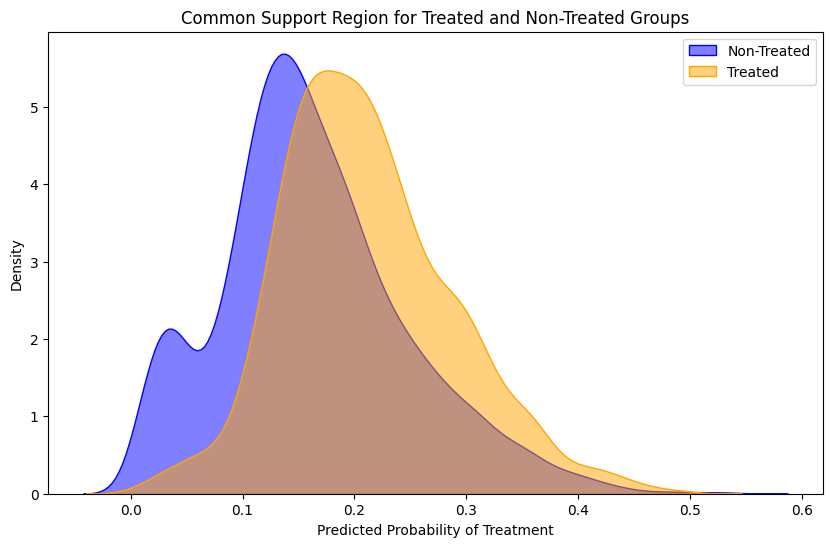

In [ ]:
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the common support region
plt.figure(figsize=(10, 6))

# Density plot for non-treated group
sns.kdeplot(non_treated, fill=True, label='Non-Treated', color='blue', alpha=0.5)

# Density plot for treated group
sns.kdeplot(treated, fill=True, label='Treated', color='orange', alpha=0.5)

# Labeling the plot
plt.title("Common Support Region for Treated and Non-Treated Groups")
plt.xlabel("Predicted Probability of Treatment")
plt.ylabel("Density")
plt.legend()
plt.show()


##Matching Model

In [ ]:
# Prepare data for the matching model
# We'll use the calculated propensity scores as a covariate along with the treatment and outcome
data_for_matching = df[['catholic', 'score_standardized']]
data_for_matching['propensity_score'] = probabilities

# Initialize the causal model with treatment, outcome, and covariates
causal_model = CausalModel(
    Y=data_for_matching['score_standardized'].values,      # Outcome variable
    D=data_for_matching['catholic'].values,                # Treatment variable
    X=data_for_matching[['propensity_score']].values       # Covariate (propensity score)
)

# Perform matching analysis
causal_model.est_via_matching()
print(causal_model.estimates)

# Display summary of causal inference model
causal_model.summary_stats

<ipython-input-24-d5aca099c9c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_matching['propensity_score'] = probabilities



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.113      0.068     -1.660      0.097     -0.247      0.020
           ATC     -0.104      0.076     -1.361      0.174     -0.253      0.046
           ATT     -0.160      0.063     -2.550      0.011     -0.283     -0.037



{'N': 5429, 'K': 1, 'N_c': 4499, 'N_t': 930, 'Y_c_mean': 0.1631279441940431, 'Y_t_mean': 0.2196850892301075, 'Y_c_sd': 0.9736968026380551, 'Y_t_sd': 0.8579016349684903, 'rdiff': 0.05655714503606438, 'X_c_mean': array([0.16300603]), 'X_t_mean': array([0.21143643]), 'X_c_sd': array([0.08483054]), 'X_t_sd': array([0.07672125]), 'ndiff': array([0.59881112])}

###Key Variables
ATE (Average Treatment Effect): Estimated effect of Catholic school attendance on standardized score for the entire sample.

ATC (Average Treatment Effect on the Controls): Estimated effect if the non-Catholic group were to attend Catholic schools.

ATT (Average Treatment Effect on the Treated): Estimated effect for Catholic students, reflecting the actual impact of attending Catholic schools on their standardized scores.

Average Treatment Effect (ATE):

The ATE estimate is -0.113, with a p-value of 0.097, which is above the conventional threshold of 0.05. This means that, while the effect of Catholic school attendance is negative (suggesting a potential reduction in standardized scores), it is not statistically significant for the entire sample.
Confidence Interval: The 95% confidence interval of [-0.247, 0.020] includes zero, reinforcing the lack of statistical significance.

Average Treatment Effect on the Controls (ATC):

The ATC estimate is -0.104, with a p-value of 0.174. This implies that if non-Catholic students attended Catholic schools, their standardized scores would be expected to be slightly lower on average, though this difference is not statistically significant.
Confidence Interval: The 95% confidence interval for ATC [-0.253, 0.046] also includes zero, indicating that this estimate is not reliably different from zero.

Average Treatment Effect on the Treated (ATT):

The ATT estimate is -0.160, with a p-value of 0.011, indicating a statistically significant effect at the 5% level. This suggests that for students who actually attended Catholic schools, there is a significant reduction in standardized scores compared to similar non-Catholic students.
Confidence Interval: The 95% confidence interval for ATT is [-0.283, -0.037], which does not include zero, supporting the significance of this negative effect for the treated group.

Conclusion
The results suggest that Catholic school attendance has a statistically significant negative effect on standardized scores specifically for Catholic students (ATT), while the ATE and ATC estimates are not statistically significant. This may indicate that attending Catholic schools has a unique impact on those who choose to attend, which does not generalize to the full sample or control group.






